<a href="https://colab.research.google.com/github/aneuni/ITB-2022/blob/main/IT%EC%99%80%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4%ED%98%81%EC%8B%A0_%EB%B6%84%EB%A5%98_%EA%B3%BC%EC%A0%9C_1914838_%EC%95%88%EC%9D%80%EC%9D%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import mglearn

## 데이터 탐색


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [6]:
from matplotlib import pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

import matplotlib.font_manager as fm
!sudo apt-get install -y fonts-nanum #Isudo = super user do
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

전처리

1. 엑셀로 결측치 확인 결과: 총콜레스테롤, 트리글리세라이드, HDL콜레스테롤, LDL콜레스테롤, 치아유식증유무, 치석은 결측치가 60% 이상임 (시각화 자료로 사용하지 않을 예정)

2. 성별코드 1(남성) / 2(여성)

3. 음주여부 1(NO) / 2(YES)

4. 흡연상태 1(NO) / 2(YES) / 3(Not now)

5. 키 / 체중에 따른 BMI 열 추가

In [7]:
# csv 데이터 가져오기, '가입자일련번호'를 인덱스로 지정

hdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IT와비즈니스혁신/data/h_d.csv', index_col='가입자일련번호')

print(hdata.columns)
display(hdata.info())      
display(hdata.head())      # 처음 5행 확인

Index(['기준년도', '시도코드', '성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg 단위)', 'BMI',
       '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압',
       '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소',
       '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부',
       '구강검진수검여부', '치아우식증유무', '치석', '데이터공개일자'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   시도코드         10000 non-null  int64  
 2   성별코드         10000 non-null  int64  
 3   연령대코드(5세단위)  10000 non-null  int64  
 4   신장(5Cm단위)    10000 non-null  int64  
 5   체중(5Kg 단위)   10000 non-null  int64  
 6   BMI          10000 non-null  float64
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)      

None

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),BMI,허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
가입자일련번호,,,,,,,,,,,,,,,,,,,,,
1,2020,36,1,9,165,60,22.0,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1,1,0,NaN,NaN,12/29/2021
2,2020,27,2,13,150,65,28.9,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1,1,0,NaN,NaN,12/29/2021
3,2020,11,2,12,155,55,22.9,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1,1,0,NaN,NaN,12/29/2021
4,2020,31,1,13,160,70,27.3,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1,1,1,0.0,0.0,12/29/2021
5,2020,41,2,12,155,50,20.8,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1,1,0,NaN,NaN,12/29/2021


In [8]:
hdata.describe()  # 가입자일련번호를 제외한 변수들의 기술통계 정보를 보여줌 

,기준년도,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),BMI,허리둘레,시력(좌),시력(우),...,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,10000.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,34.100100,1.486200,11.931400,160.983500,63.034500,24.203080,82.366100,0.933750,0.936750,...,1.119461,0.848484,27.58979,26.789851,38.098668,1.569300,1.581900,0.325100,0.175331,0.579514
std,0.0,12.394581,0.499835,2.166048,9.211608,12.205294,3.491124,9.561973,0.662057,0.641378,...,0.489782,0.301012,17.88442,23.735687,58.184579,0.794015,0.493271,0.468436,0.380308,0.591269
min,2020.0,11.000000,1.000000,9.000000,130.000000,30.000000,13.300000,53.000000,0.100000,0.100000,...,1.000000,0.050000,3.00000,2.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2020.0,27.000000,1.000000,10.000000,155.000000,55.000000,22.000000,76.000000,0.700000,0.700000,...,1.000000,0.700000,20.00000,16.000000,16.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,2020.0,41.000000,1.000000,12.000000,160.000000,60.000000,23.900000,82.000000,0.900000,0.900000,...,1.000000,0.800000,24.00000,21.000000,24.000000,1.000000,2.000000,0.000000,0.000000,1.000000
75%,2020.0,44.000000,2.000000,13.000000,170.000000,70.000000,26.100000,88.900000,1.200000,1.200000,...,1.000000,1.000000,30.00000,31.000000,39.000000,2.000000,2.000000,1.000000,0.000000,1.000000
max,2020.0,49.000000,2.000000,18.000000,195.000000,130.000000,43.700000,134.000000,9.900000,9.900000,...,6.000000,9.200000,692.00000,1146.000000,2322.000000,3.000000,2.000000,1.000000,1.000000,2.000000


2    5819
1    4181
Name: 음주여부, dtype: int64


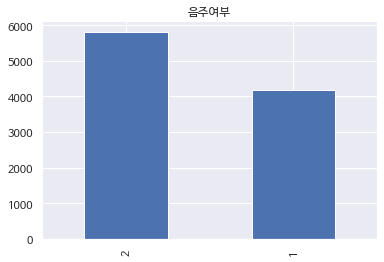

In [9]:
print(hdata['음주여부'].value_counts())

hdata['음주여부'].value_counts().plot.bar()
plt.title('음주여부')
plt.show()

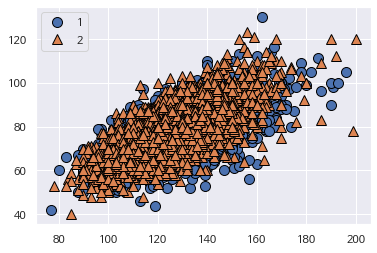

In [10]:
#음주여부(No=1, Yes=2)에 따른 수축기/이완기 혈압
mglearn.discrete_scatter(hdata['수축기혈압'], hdata['이완기혈압'], hdata['음주여부'])
plt.legend()
plt.show()

## 의사결정나무 (Decision tree) 모델 

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


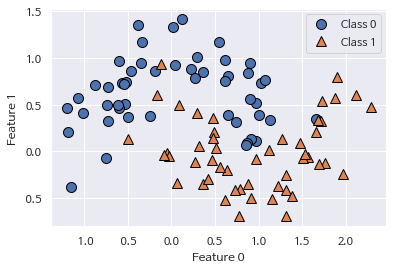

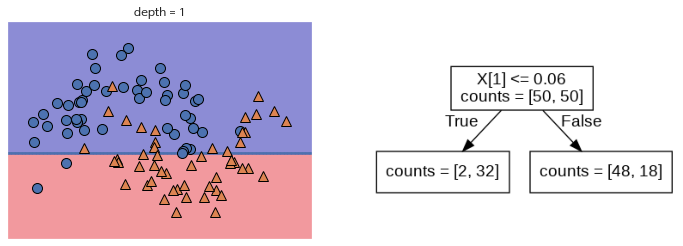

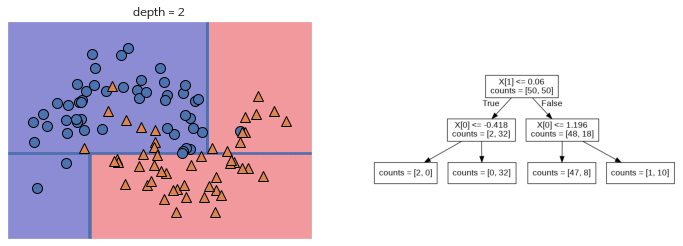

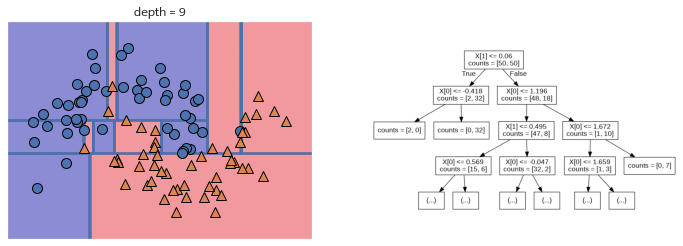

In [11]:
# 의사결정나무 만드는 과정 
mglearn.plots.plot_tree_progressive()

In [12]:
hdata_n = hdata.dropna(axis=0)

In [13]:
hdata_new = hdata_n.loc[:, ['수축기혈압','이완기혈압', '식전혈당(공복혈당)', '흡연상태','음주여부']]

In [14]:
hdata_new

,수축기혈압,이완기혈압,식전혈당(공복혈당),흡연상태,음주여부
가입자일련번호,,,,,
7,112.0,73.0,250.0,2,2
17,138.0,88.0,94.0,1,2
22,114.0,73.0,94.0,1,1
28,139.0,85.0,104.0,1,2
48,110.0,72.0,114.0,1,2
...,...,...,...,...,...
9955,108.0,70.0,98.0,1,2
9964,124.0,80.0,98.0,1,2
9966,135.0,86.0,99.0,1,1


### DecisionTreeClassifier


In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = hdata_new[['수축기혈압','이완기혈압', '식전혈당(공복혈당)', '흡연상태']]
y = hdata_new['음주여부']



# 데이터셋을 학습(train)과 테스트(test) 세트로 분할
# random_state : random 으로 분할시 사용되는 난수 seed 숫자
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)  
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.994
시험용 데이터 정확도: 0.581


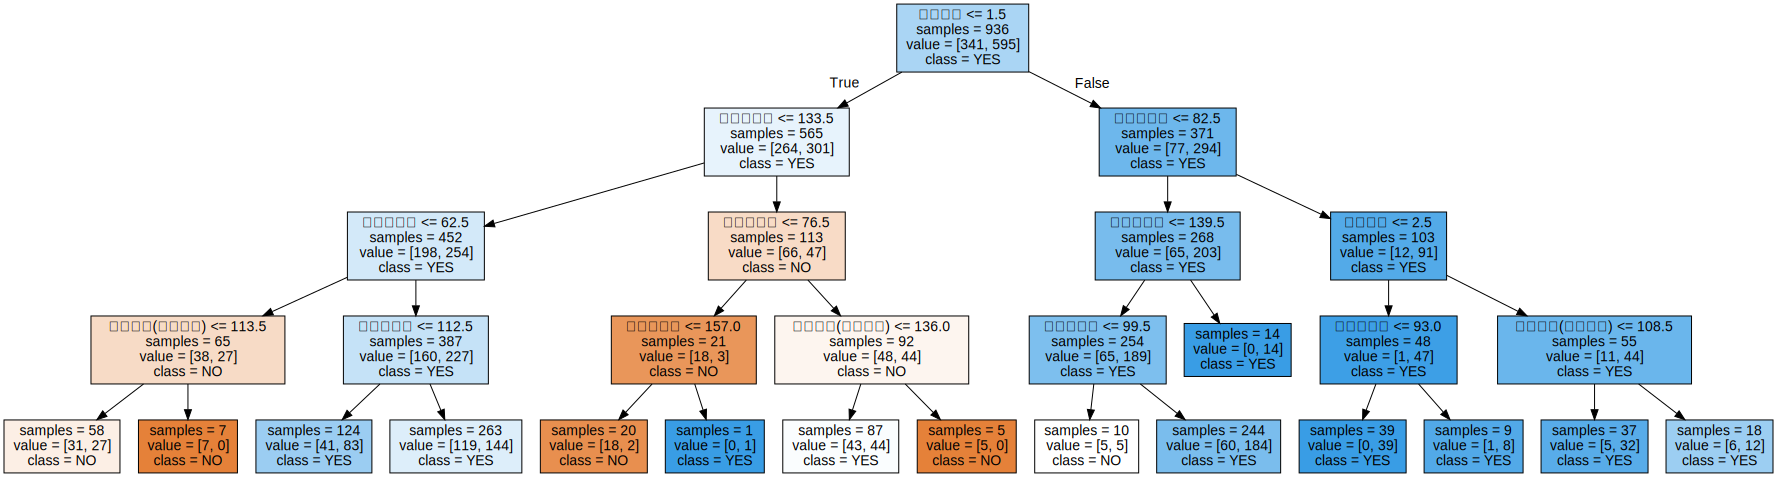

In [17]:
#graphviz 라이브러리를 이용하여 의사결정나무 그리기 
from sklearn.tree import export_graphviz
import graphviz

# filled = True: 색상의 진하기로 클래스를 나타냄, impurity: 불순도 계산값 보여주기 옵션
export_graphviz(tree, out_file="tree.dot", class_names=[ "NO", "YES"],
                feature_names=hdata_new.columns[:5], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

### 주요 변수들 (features)
- 의사결정나무를 생성하는데 비중이 큰 변수들을 찾을 수 있지만, feature importance가 낮다고 하여 그 변수가 중요하지 않다는 것은 아님 (이 나무에서 그 변수가 사용되지 않았을 뿐 다른 변수가 동일한 정보를 지니고 있어서일 수도 있음)  
- 의사결정나무를 생성하는데 중요도가 높다는 것은 알 수 있지만, 양성을 지지하는지 악성을 지지하는지는 알 수 없음 

In [18]:
result = tree.feature_importances_
print("변수의 중요도:\n", result)

변수의 중요도:
 [0.18605726 0.16510469 0.10395148 0.54488657]


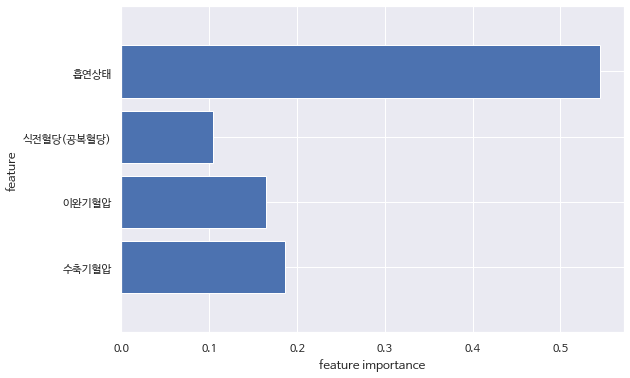

In [19]:
import numpy as np

def plot_feature_importances_hdata_new(model):
    plt.rcParams["figure.figsize"] = (9,6)
    n_features = len(hdata_new.columns[:4])  
    plt.barh(np.arange(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), hdata_new.columns[:4])  
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features) #Y 축 범위 지정

plot_feature_importances_hdata_new(tree)

In [37]:
res = pd.DataFrame(result)
res["name"] = hdata_new.columns[:4]
display(res.info())

display(res.sort_values(by='name'))  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4 non-null      float64
 1   name    4 non-null      object 
dtypes: float64(1), object(1)
memory usage: 192.0+ bytes


None

,0,name
0,0.186057,수축기혈압
2,0.103951,식전혈당(공복혈당)
1,0.165105,이완기혈압
3,0.544887,흡연상태


## 앙상블 (Ensemble) 모델

###랜덤 포레스트 (Random forest)
- 의사결정나무를 '랜덤하게' 여러가지로 만들고 이들의 평균을 취하는 방법으로 과적합 문제를 완화시킬 수 있다. 
- 랜덤한 속성을 찾는 방법으로
 * 샘플을 임의로 취하거나 
 * 변수(feature)를 임의로 취한다.
- 평균을 구할 전체 나무의 숫자를 정해준다. (n_estimators)
- 샘플 데이터를 랜덤하게 취하기 위해서 부트스트랩 (Bootstrapping) 샘플링을 한다. (같은 수의 샘플을 취하되 중복 샘플링을 허용하는 방법). 샘플수가 100개면 한번도 샘플링 되지 않는 샘플수가 약 36%정도 된다.
- 몇 개의 변수(feature)를 사용할지도 지정한다. (max_features)
- 변수를 선택하는 작업은 각 노드에서 반복되므로 노드마다 "랜덤하게" 다른 변수를 사용하게 된다.
- 분류의 경우는 확률을 고려한 약한 투표를 하고 (대표값 하나만 투표하지 않고 여러 가능성의 가중평균을 구함), 회귀분석의 경우에는 앙상블의 평균치를 구한다.  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


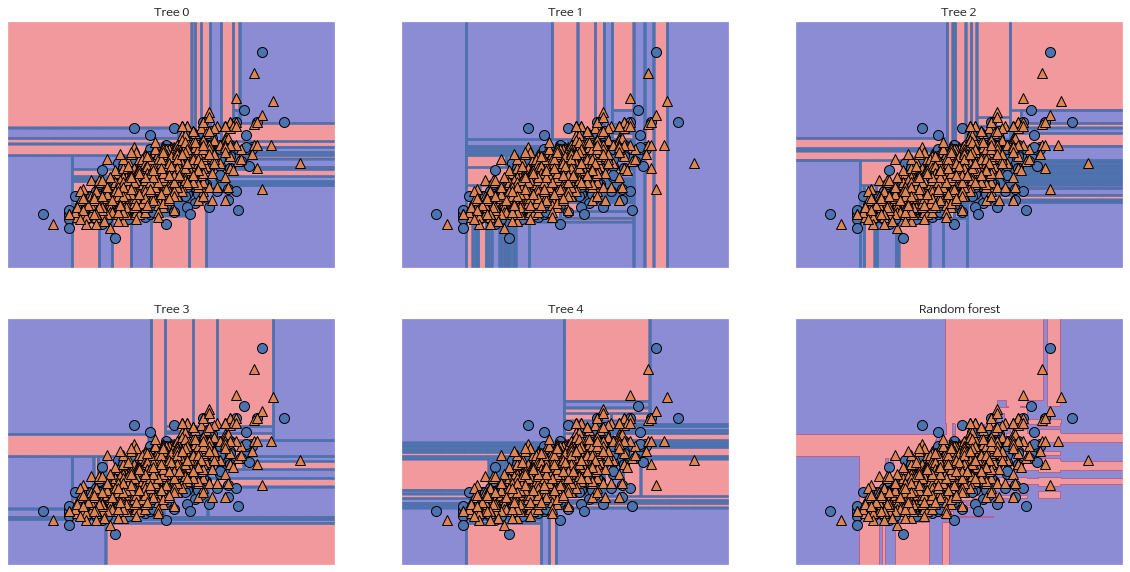

In [21]:
from sklearn.ensemble import RandomForestClassifier

# 수축기, 이완기혈압 변수만 이용하여 
# 5개의 나무를 만드는 예 (n_estimators = 5, 실제는 수백개의 트리를 만든다)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

# 5개 나무 각각의 분류 경계를 그림 (서로 모양이 많이 다르다)
# 2차원으로 나무의 결과를 보여주기 위한 코드로 mglearn의 함수들을 이용
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [22]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.994
시험용 데이터 세트 정확도: 0.652


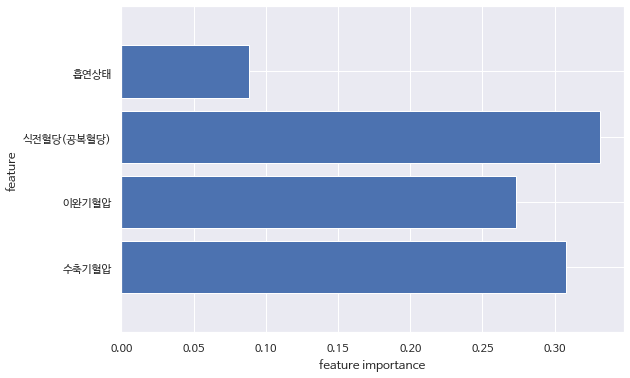

In [38]:
# 단일 의사결정나무의 경우보다 많은 변수(feature)들이 사용됨
plot_feature_importances_hdata_new(forest)

In [24]:
from sklearn.model_selection import cross_val_score

# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 

Accuracy
Decision tree:  [0.62765957 0.4787234  0.57446809 0.5106383  0.63829787 0.56382979
 0.46236559 0.58064516 0.60215054 0.58064516]
Random forest:  [0.58510638 0.5106383  0.58510638 0.57446809 0.60638298 0.57446809
 0.55913978 0.5483871  0.61290323 0.60215054]
Accuracy mean
Decision tree :0.562
Random forest :0.576


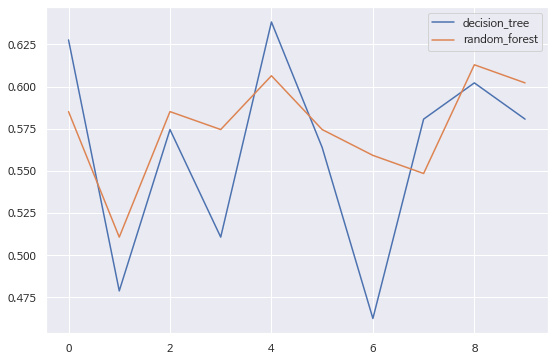

In [25]:
cv_list = [    
            ['decision_tree',dt_scores],
            ['random_forest',rf_scores],
          ]
df = pd.DataFrame.from_dict(dict(cv_list))
df.plot()

###그래디언트 부스팅 (Gradient Boosting)

- 랜덤한 방식으로 트리의 앙상블을 구하는 것이 아니라 이전의 트리의 성능을 단계적으로 보완하여 오차를 줄이는 방식으로 나무를 생성한다. 
- 보통 1~5 정도의 깊지 않은 나무 (약한 학습기, weak learner)를 사용함으로써 학습 속도가 빠르다. 
- 이전 나무의 오차를 얼마나 강하게 보정할 것인지를 제어하는 학습속도(learning rate)를 미세하게 조정해주어야 한다.
- 가장 성능이 좋은 알고리즘으로 분류 및 예측에 모두 사용된다.

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
# 기본값은 max_depth= 3, n_estimators=100, learning_rate = 0.1

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [27]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.764
시험용 데이터 세트 정확도: 0.668


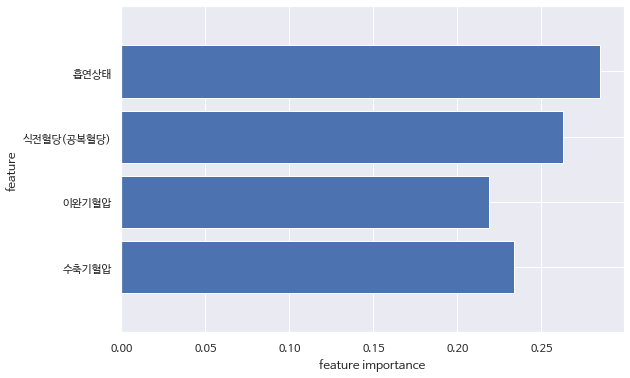

In [28]:
plot_feature_importances_hdata_new(gbrt)

In [29]:
#나무 깊이 제한
gbrt = GradientBoostingClassifier(random_state=0, max_depth=2)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.706
시험용 데이터 세트 정확도: 0.668


# 분류 모델 평가 (Evaluation)


## 교차 검증 (Cross validation)


In [31]:
# 교차 검증을 10번 수행하여 10번의 교차 검증 평균 정확도를 비교 (10-fold cross validation)
# default cv=5

dt_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=10, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=10, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

Accuracy
Decision tree:  [0.62765957 0.4787234  0.57446809 0.5106383  0.63829787 0.56382979
 0.46236559 0.58064516 0.60215054 0.58064516]
Random forest:  [0.58510638 0.5106383  0.58510638 0.57446809 0.60638298 0.57446809
 0.55913978 0.5483871  0.61290323 0.60215054]
Gradient boosting:  [0.65957447 0.63829787 0.64893617 0.65957447 0.64893617 0.59574468
 0.64516129 0.6344086  0.6344086  0.61290323]
Accuracy mean
Decision tree :0.562
Random forest :0.576
Gradient boosting :0.638


In [32]:
# 교차 검증 상세 옵션 지정

from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)
#from sklearn.model_selection import RepeatedStratifiedKFold
#kf = RepeatedStratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.562
Random forest :0.576
Gradient boosting :0.638


### 정오 분류표 (Confusion matrix)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 

print(y_test.value_counts())


rf_pred = forest.predict(X_test)
gbrt_pred = gbrt.predict(X_test)


print('Random forest 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, rf_pred)))
print(confusion_matrix(y_test, rf_pred))
print('Gradient boosting 시험용 데이터 세트 정확도:{:.3f}'.format(accuracy_score(y_test, gbrt_pred)))
print(confusion_matrix(y_test, gbrt_pred))

2    207
1    106
Name: 음주여부, dtype: int64
Random forest 시험용 데이터 세트 정확도:0.652
[[ 52  54]
 [ 55 152]]
Gradient boosting 시험용 데이터 세트 정확도:0.687
[[ 13  93]
 [  5 202]]


In [44]:
from sklearn.metrics import classification_report

cfreport=classification_report(y_test, rf_pred)
print("Random forest 분류예측 레포트:\n", cfreport)

cfreport2=classification_report(y_test, gbrt_pred)
print("Gradient boosting 분류예측 레포트:\n", cfreport2)

Random forest 분류예측 레포트:
               precision    recall  f1-score   support

           1       0.49      0.49      0.49       106
           2       0.74      0.73      0.74       207

    accuracy                           0.65       313
   macro avg       0.61      0.61      0.61       313
weighted avg       0.65      0.65      0.65       313

Gradient boosting 분류예측 레포트:
               precision    recall  f1-score   support

           1       0.72      0.12      0.21       106
           2       0.68      0.98      0.80       207

    accuracy                           0.69       313
   macro avg       0.70      0.55      0.51       313
weighted avg       0.70      0.69      0.60       313



* 독립변수와 종속변수 

독립변수: 수축기혈압, 이완기혈압, 식전혈당(공복혈당), 흡연상태 / 종속변수: 음주여부




* 학습용 / 시험용 데이터세트 정확도 

의사결정나무의 학습용 데이터 세트 정확도는 0.994, 시험용 데이터 세트 정확도는 0.581이다.

랜덤포레스트의 학습용 데이터 세트 정확도는 0.994, 시험용 데이터 세트 정확도는 0.652이다.

그래디언트부스팅의 학습용 데이터 세트 정확도는 0.764, 시험용 데이터 세트 정확도는 0.668이다.

**그래디언트부스팅의 시험용 데이터 세트 정확도가 가장 높아 최적의 분류모델은 그래디언트부스팅이라 생각한다.**

* 중요변수 

의사결정나무 모델, 그래디언트부스팅에서 가장 중요한 변수는 흡연상태이다.
랜덤포레스트에서 가장 중요한 변수는 식전혈당(공복혈당)이다.